# EIGENSTRAT / SMARTPCA

Goal: To examine patterns of population structure in duplicated loci.

### Take away:
* PCAs of genetic data:
    - full data coded as codominant genotypes (normal bi-allelic SNPs)
    - full data coded as dominant alleles
    - paralogs coded as dominant alleles

### Programs used:
* [EIGENSOFT](http://www.hsph.harvard.edu/alkes-price/software/) (specifically SMARTPCA)
 - Patterson N, Price AL, Reich D (2006) Population Structure and Eigenanalysis. PLoS Genet 2(12): e190. doi: 10.1371/journal.pgen.0020190

#### Python imports

In [1]:
import os.path
import collections
import numpy as np
import pandas as pd
import random
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns

#### Load EIGENSTRAT results 
eigenvectors

In [2]:
def load_evecs(evec_file):
    evecs = pd.read_csv(evec_file, sep = ' ', skipinitialspace = True)
    evecs.columns = ['ind', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'junk']
    evecs = evecs[['ind', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]
    evecs['POP'] = [int(xx.split(':')[0]) for xx in evecs['ind']]
    return(evecs)

In [3]:
complete_codom_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','complete.codom.evec'))
complete_dom_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','complete.dom.evec'))
on_map_codom_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','on_map.codom.evec'))
on_map_dom_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','on_map.dom.evec'))
paralogs_dom_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','paralogs.dom.evec'))

complete_codom_subsample_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','complete.codom.subsample.evec'))
complete_dom_subsample_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','complete.dom.subsample.evec'))
on_map_codom_subsample_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','on_map.codom.subsample.evec'))
on_map_dom_subsample_evecs = load_evecs(os.path.join('results','batch_4','EIGENSOFT','on_map.dom.subsample.evec'))

In [4]:
def load_evals(eval_file):
    evals = pd.read_csv(eval_file, sep = ' ', skipinitialspace = True, header = None)
    evals['percent_explained'] = 100*evals[0]/np.sum(evals[0])
    return(evals)

In [5]:
complete_dom_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','complete.dom.eval'))
paralogs_dom_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','paralogs.dom.eval'))
complete_dom_subsample_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','complete.dom.subsample.eval'))

### Plot EIGENSOFT results

### rotate PC1 

In [11]:
#complete_dom_subsample_evecs['PC1'] = -complete_dom_subsample_evecs['PC1']
paralogs_dom_evecs['PC2'] = -paralogs_dom_evecs['PC2']


## Fonts

In [7]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
#print font_names
for xx in font_names:
    if xx.startswith('Rob'):
        pass
        #print xx

#### Plot formatting

In [8]:
sns.set(font="Roboto Slab")
sns.set(font_scale=2)
#sns.set_context("poster")
sns.set_style("white")
%matplotlib inline

#### Manually color populations 

In [9]:
pop_colors = ['purply pink', 'golden', 'leaf green', 'blood', 'vomit', 'primary blue', 
              'bright sky blue', 'dark cyan', 'grey', 'red']

## new colors after reorder

In [11]:
pop_colors = ['purply pink',
 'bright sky blue',
 'golden',
 'blood',
 'vomit',
 'primary blue',
 'grey',
 'red',
 'dark cyan',
 'leaf green']

## Plot

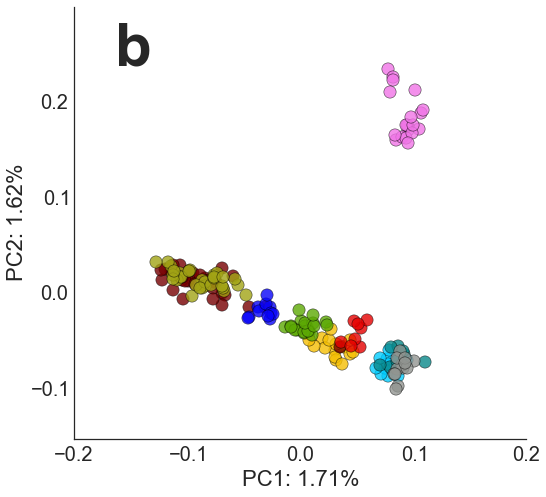

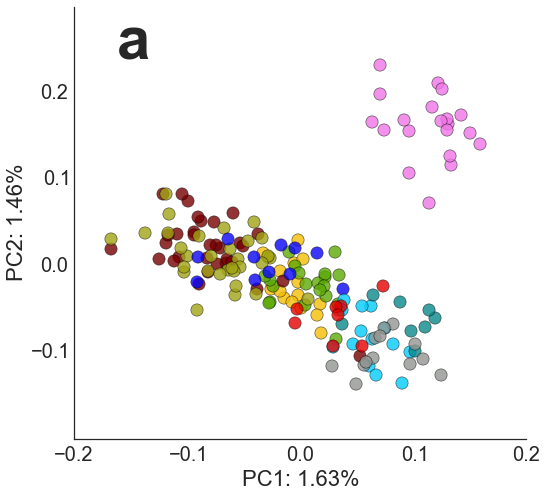

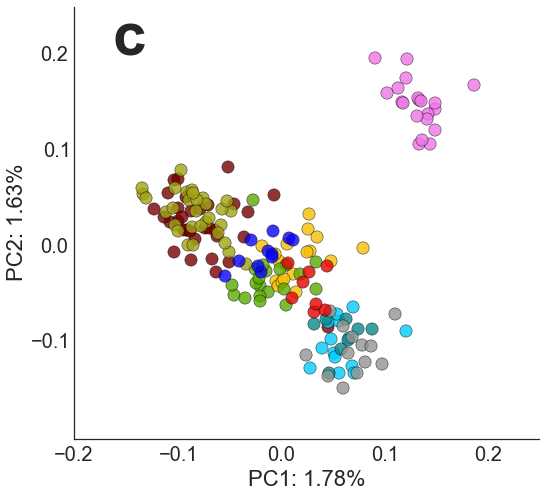

In [12]:
sns.lmplot(data = complete_dom_evecs, x='PC1', y='PC2', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1,
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC1: {0:.3g}%'.format(complete_dom_evals['percent_explained'][0]))
plt.ylabel('PC2: {0:.3g}%'.format(complete_dom_evals['percent_explained'][1]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .24, s = 'b', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('/home/ipseg/Desktop/waples/chum_populations/paper/figures/PCA_b.png')


sns.lmplot(data = paralogs_dom_evecs, x='PC1', y='PC2', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1, 
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC1: {0:.3g}%'.format(paralogs_dom_evals['percent_explained'][0]))
plt.ylabel('PC2: {0:.3g}%'.format(paralogs_dom_evals['percent_explained'][1]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .24, s = 'a', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('/home/ipseg/Desktop/waples/chum_populations/paper/figures/PCA_a.png')


sns.lmplot(data = complete_dom_subsample_evecs, x='PC1', y='PC2', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1, 
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC1: {0:.3g}%'.format(complete_dom_subsample_evals['percent_explained'][0]))
plt.ylabel('PC2: {0:.3g}%'.format(complete_dom_subsample_evals['percent_explained'][1]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .20, s = 'c', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('/home/ipseg/Desktop/waples/chum_populations/paper/figures/PCA_c.png')

plt.show()

## subsequent axes

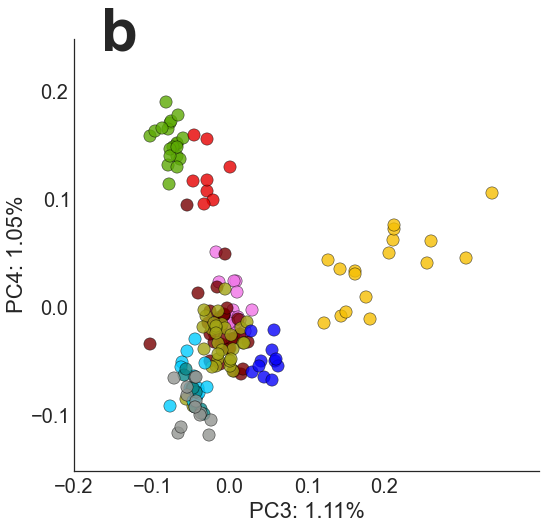

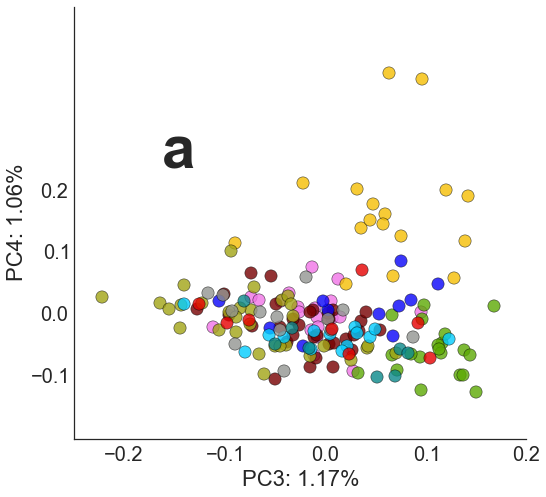

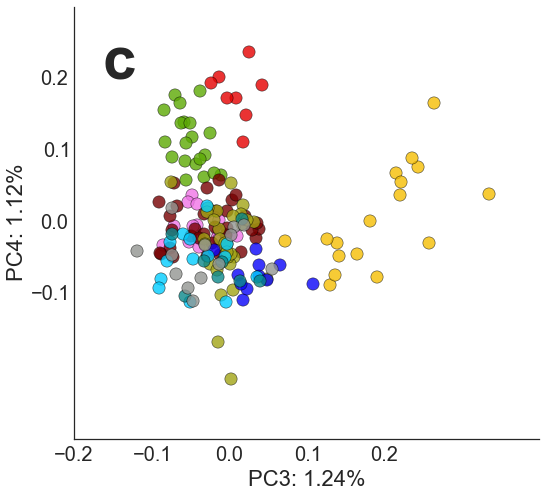

In [32]:
sns.lmplot(data = complete_dom_evecs, x='PC3', y='PC4', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1,
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC3: {0:.3g}%'.format(complete_dom_evals['percent_explained'][2]))
plt.ylabel('PC4: {0:.3g}%'.format(complete_dom_evals['percent_explained'][3]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .24, s = 'b', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
plt.savefig(os.path.join('paper','figures', 'supplemental','PCA_b_3_4.png'), bbox_inches='tight')


sns.lmplot(data = paralogs_dom_evecs, x='PC3', y='PC4', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1, 
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC3: {0:.3g}%'.format(paralogs_dom_evals['percent_explained'][2]))
plt.ylabel('PC4: {0:.3g}%'.format(paralogs_dom_evals['percent_explained'][3]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .24, s = 'a', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
plt.savefig(os.path.join('paper','figures', 'supplemental','PCA_a_3_4.png'), bbox_inches='tight')



sns.lmplot(data = complete_dom_subsample_evecs, x='PC3', y='PC4', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1, 
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC3: {0:.3g}%'.format(complete_dom_subsample_evals['percent_explained'][2]))
plt.ylabel('PC4: {0:.3g}%'.format(complete_dom_subsample_evals['percent_explained'][3]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .20, s = 'c', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
plt.savefig(os.path.join('paper','figures', 'supplemental','PCA_c_3_4.png'), bbox_inches='tight')

plt.show()

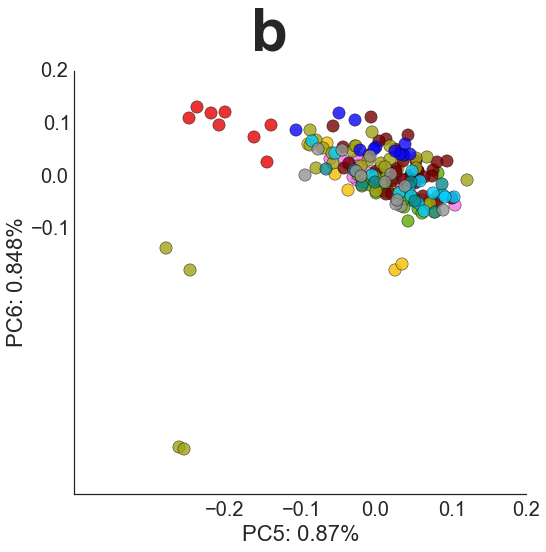

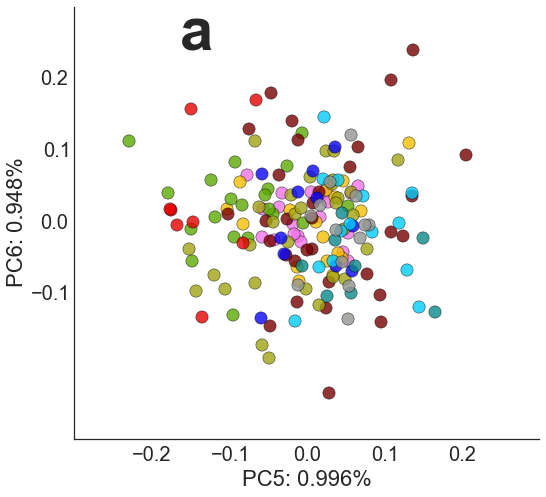

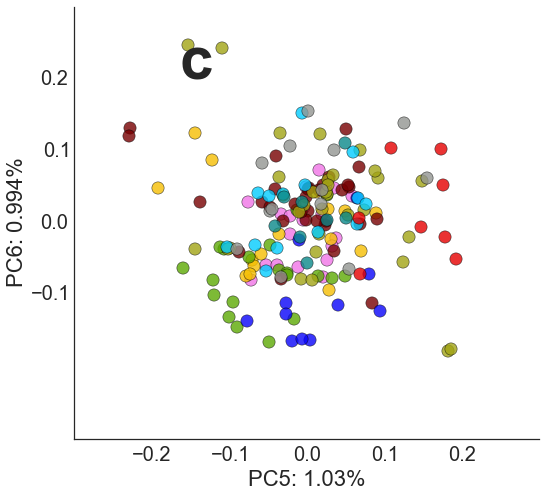

In [34]:
sns.lmplot(data = complete_dom_evecs, x='PC5', y='PC6', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1,
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC5: {0:.3g}%'.format(complete_dom_evals['percent_explained'][4]))
plt.ylabel('PC6: {0:.3g}%'.format(complete_dom_evals['percent_explained'][5]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .24, s = 'b', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
plt.savefig(os.path.join('paper','figures', 'supplemental','PCA_b_5_6.png'), bbox_inches='tight')


sns.lmplot(data = paralogs_dom_evecs, x='PC5', y='PC6', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1, 
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC5: {0:.3g}%'.format(paralogs_dom_evals['percent_explained'][4]))
plt.ylabel('PC6: {0:.3g}%'.format(paralogs_dom_evals['percent_explained'][5]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .24, s = 'a', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
plt.savefig(os.path.join('paper','figures', 'supplemental','PCA_a_5_6.png'), bbox_inches='tight')



sns.lmplot(data = complete_dom_subsample_evecs, x='PC5', y='PC6', hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, aspect = 1.1, 
           scatter_kws={"s": 150., 'alpha': .8, 'edgecolor':"black", 'linewidths':.5}, legend = False)
plt.xlabel('PC5: {0:.3g}%'.format(complete_dom_subsample_evals['percent_explained'][4]))
plt.ylabel('PC6: {0:.3g}%'.format(complete_dom_subsample_evals['percent_explained'][5]))
plt.xticks([-.2, -.1, 0, .1, .2 ])
plt.yticks([-.1, 0, .1, .2 ])
plt.text(-.16, .20, s = 'c', family = 'sans-serif', fontsize=60, fontweight = 'bold')
plt.tight_layout()
plt.savefig(os.path.join('paper','figures', 'supplemental','PCA_c_5_6.png'), bbox_inches='tight')

plt.show()

In [11]:
assert False

AssertionError: 

## For paper

In [ ]:
def plot_evecs(data, ax1 = 'PC1', ax2 = 'PC2', title = 'untitled', figname = 'fig0.png', pop_colors = pop_colors):
    sns.lmplot(data = data, x=ax1, y=ax2, hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 7, scatter_kws={"s": 150., 'alpha': .6} )
    plt.title(title)
    sns.despine()    
    plt.savefig('/home/ipseg/Desktop/waples/chum_populations/paper/figures/{}'.format(figname))
    plt.show()

In [ ]:
plot_evecs(complete_codom_evecs, title ='PCA - complete - codom', figname= 'PCA_complete_codom.png')
plot_evecs(complete_dom_evecs, title ='PCA - complete - dom', figname='PCA_complete_dom.png')

plot_evecs(on_map_codom_evecs, title ='PCA - on_map - codom', figname='PCA_on_map_codom.png')
plot_evecs(on_map_dom_evecs, title ='PCA - on_map - dom', figname='PCA_on_map_dom.png')

plot_evecs(paralogs_dom_evecs, title ='PCA - paralogs', figname='PCA_paralogs.png')

plot_evecs(complete_codom_subsample_evecs, title ='PCA - complete - codom - subsample', figname='PCA_complete_codom_subsample.png')
plot_evecs(complete_dom_subsample_evecs, title ='PCA - complete - dom - subsample', figname='PCA_complete_dom_subsample.png')

plot_evecs(on_map_codom_subsample_evecs, title ='PCA - on_map - codom - subsample', figname='PCA_on_map_codom_subsample.png')
plot_evecs(on_map_dom_subsample_evecs, title ='PCA - on_map - dom - subsample', figname='PCA_on_map_dom_subsample.png')

### Scree plot of eigenvalues

In [ ]:
def load_evals(eval_file):
    evals = pd.read_csv(eval_file, sep = ' ', skipinitialspace = True, header = None)
    evals['percent_explained'] = 100*evals[0]/np.sum(evals[0])
    return(evals)

In [ ]:
complete_codom_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','complete.codom.eval'))
complete_dom_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','complete.dom.eval'))

on_map_codom_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','on_map.codom.eval'))
on_map_dom_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','on_map.dom.eval'))

paralogs_dom_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','paralogs.dom.eval'))

complete_codom_subsample_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','complete.codom.subsample.eval'))
complete_dom_subsample_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','complete.dom.subsample.eval'))
on_map_codom_subsample_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','on_map.codom.subsample.eval'))
on_map_dom_subsample_evals = load_evals(os.path.join('results','batch_4','EIGENSOFT','on_map.dom.subsample.eval'))

In [ ]:
figsize(8,8)
   
plt.plot(complete_codom_evals['percent_explained'], label = 'complete_codom_evals', c = sns.xkcd_palette(pop_colors)[0])
plt.plot(complete_dom_evals['percent_explained'], label = 'complete_dom_evals', c = sns.xkcd_palette(pop_colors)[1])
plt.plot(on_map_codom_evals['percent_explained'], label = 'on_map_codom_evals', c = sns.xkcd_palette(pop_colors)[2])
plt.plot(on_map_dom_evals['percent_explained'], label = 'on_map_dom_evals', c = sns.xkcd_palette(pop_colors)[3])
plt.plot(paralogs_dom_evals['percent_explained'], label = 'paralogs_dom_evals', c = sns.xkcd_palette(pop_colors)[4])

plt.plot(complete_codom_subsample_evals['percent_explained'], label = 'complete_codom_subsample_evals', c = sns.xkcd_palette(pop_colors)[5])
plt.plot(complete_dom_subsample_evals['percent_explained'], label = 'complete_dom_subsample_evals', c = sns.xkcd_palette(pop_colors)[6])
plt.plot(on_map_codom_subsample_evals['percent_explained'], label = 'on_map_codom_subsample_evals', c = sns.xkcd_palette(pop_colors)[7])
plt.plot(on_map_dom_subsample_evals['percent_explained'], label = 'on_map_dom_subsample_evals', c = sns.xkcd_palette(pop_colors)[8])

plt.xlim(-.5,7)
plt.xticks(range(0,8), range(1,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC axis')
plt.ylabel('Percent explained')
sns.despine()
plt.savefig('/home/ipseg/Desktop/waples/chum_populations/paper/figures/supplemental/PCA_eigenvalues.png')

### Plot snp weights

In [ ]:
def load_snpweights(snpweights_file):
    snpweights = pd.read_csv(snpweights_file, sep = ' ', skipinitialspace = True, header = None)
    snpweights.columns = ['locus', 'LG', 'pos'] +  ['wPC{}'.format(x) for x in range(1,11)]
    return(snpweights)

In [ ]:
complete_codom_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','complete.codom.snpweights'))
complete_dom_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','complete.dom.snpweights'))

on_map_codom_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','on_map.codom.snpweights'))
on_map_dom_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','on_map.dom.snpweights'))

paralogs_dom_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','paralogs.dom.snpweights'))

complete_codom_subsample_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','complete.codom.subsample.snpweights'))
complete_dom_subsample_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','complete.dom.subsample.snpweights'))
on_map_codom_subsample_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','on_map.codom.subsample.snpweights'))
on_map_dom_subsample_snpweights = load_snpweights(os.path.join('results','batch_4','EIGENSOFT','on_map.dom.subsample.snpweights'))

In [ ]:
sns.pairplot(complete_codom_snpweights, 
             vars = ['wPC{}'.format(x) for x in range(1,7)], 
             plot_kws={'alpha':.7, 's':30, 'linewidth':0 }, diag_kind="hist", markers = 'o')
plt.show()

In [ ]:
sns.pairplot(complete_dom_snpweights, 
             vars = ['wPC{}'.format(x) for x in range(1,7)], 
             plot_kws={'alpha':.7, 's':30, 'linewidth':0 }, diag_kind="hist", markers = 'o')
plt.show()

In [ ]:
sns.pairplot(paralogs_dom_snpweights, 
             vars = ['wPC{}'.format(x) for x in range(1,7)], 
             plot_kws={'alpha':.7, 's':30, 'linewidth':0 }, diag_kind="hist", markers = 'o')
plt.show()

In [ ]:
sns.pairplot(on_map_codom_snpweights, 
             vars = ['wPC{}'.format(x) for x in range(1,7)], 
             plot_kws={'alpha':.5, 's':30, 'linewidth':0 }, diag_kind="hist", markers = 'o')
plt.show()

In [ ]:
from skbio.stats.spatial import procrustes
help(procrustes)

"disparity" is equivalent to the "sum of squared differences between X and Yrot" as reported by the vegan R pacakge.  Use R for a more developed method including residuals, and permutation-based significance testing.

In [ ]:
mtx1, mtx2, disparity = procrustes(complete_dom_evecs.iloc[:,1:7], complete_codom_evecs.iloc[:,1:7])
disparity

In [ ]:
mtx1, mtx2, disparity = procrustes(complete_dom_subsample_evecs.iloc[:,1:11], paralogs_dom_evecs.iloc[:,1:11])
disparity

### Formally test for population structure
using the twstats program from EIGENSTRAT.

This program compares the distribution of output eigenvalues to those generated by the Tracy-Widom distribution, see Patterson (2006).

#### run twstats

In [6]:
! /home/ipseg/Programs/EIGENSOFT/EIG6.0.1/bin/twstats \
-t /home/ipseg/Programs/EIGENSOFT/EIG6.0.1/POPGEN/twtable \
-i /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/paralogs.dom.eval \
-o /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/paralogs.dom.tw

In [7]:
! /home/ipseg/Programs/EIGENSOFT/EIG6.0.1/bin/twstats \
-t /home/ipseg/Programs/EIGENSOFT/EIG6.0.1/POPGEN/twtable \
-i /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.eval \
-o /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.tw

In [8]:
!/home/ipseg/Programs/EIGENSOFT/EIG6.0.1/bin/twstats \
-t /home/ipseg/Programs/EIGENSOFT/EIG6.0.1/POPGEN/twtable \
-i /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/complete.dom.eval \
-o /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/complete.dom.tw

In [16]:
!/home/ipseg/Programs/EIGENSOFT/EIG6.0.1/bin/twstats \
-t /home/ipseg/Programs/EIGENSOFT/EIG6.0.1/POPGEN/twtable \
-i /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.subsample.eval \
-o /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.subsample.tw

In [ ]:
! /home/ipseg/Programs/EIGENSOFT/EIG6.0.1/bin/twstats \
-t /home/ipseg/Programs/EIGENSOFT/EIG6.0.1/POPGEN/twtable \
-i /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/paralogs.dom.eval \
-o /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/paralogs.dom.tw

#### Plot Tracy-Widom stats

In [14]:
tw_onmap_codom = pd.read_csv(
    '/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.tw',
           sep = ' ', skipinitialspace = True)

IOError: File /home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.tw does not exist

In [15]:
tw_onmap_dom = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT', 'on_map.dom.tw'), sep = ' ', skipinitialspace = True)

In [17]:
tw_paralogs_dom = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT', 'paralogs.dom.tw'),
           sep = ' ', skipinitialspace = True)

In [21]:
tw_complete_dom = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT', 'complete.dom.tw'),
           sep = ' ', skipinitialspace = True)

In [26]:
tw_subsample_codom = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT', 'on_map.codom.subsample.tw'),
           sep = ' ', skipinitialspace = True)

In [27]:
tw_paralogs_dom.head()

,#N,eigenvalue,difference,twstat,p-value,effect.,n
0,1,2.819728,NaN,58.892,7.155550e-133,1402.534,NaN
1,2,2.527649,-0.292079,51.406,1.022560e-108,1604.912,NaN
2,3,2.030819,-0.496830,24.982,4.447890e-38,1791.222,NaN
3,4,1.841122,-0.189697,14.272,1.776790e-17,1879.609,NaN
4,5,1.722421,-0.118701,7.334,5.373120e-08,1937.363,NaN


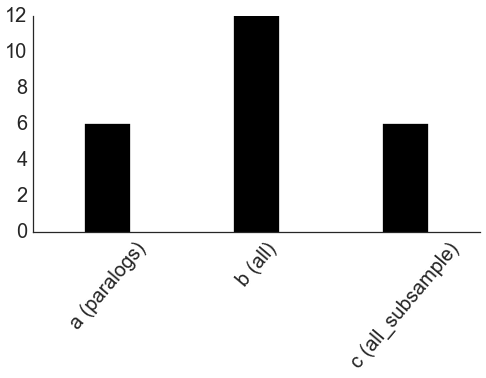

In [29]:
figsize(8,4)
#plt.plot(-np.log10(tw_onmap_codom['p-value']), label = 'all_codom')
#plt.plot(-np.log10(tw_onmap_dom['p-value']), label = 'all_dom')
#plt.plot(-np.log10(tw_paralogs_dom['p-value']), label = 'paralogs')
#plt.xlim(-1,10)
#plt.bar(1, np.sum(tw_onmap_codom['p-value'] < .01), label = 'all_codom', color = 'green', align='center', width=0.3)
plt.bar(1, np.sum(tw_paralogs_dom['p-value'] < .05), label = 'paralogs', color = 'black', align='center', width=0.3)
plt.bar(2, np.sum(tw_complete_dom['p-value'] < .05), label = 'all_dom', color = 'black', align='center', width=0.3)
plt.bar(3, np.sum(tw_subsample_codom['p-value'] < .05), label = 'subsample', color = 'black', align='center', width=0.3)
#plt.gcf().tight_layout()
#plt.legend()
plt.gcf().subplots_adjust(bottom=0.15)
plt.xticks([1,2,3],['a (paralogs)', 'b (all)', 'c (all_subsample)'], rotation= 50)
sns.despine()
plt.savefig(os.path.join('paper','figures', 'supplemental','TW_stats.png'), bbox_inches='tight')
plt.show()

In [ ]:
figsize(10, 10)
sns.lmplot('PC2', 'PC3', data= eigenvec_on_map_dom, hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6} )
plt.title('mapped loci - dominance coding from haplotypes file')
plt.show()

sns.lmplot('PC2', 'PC3', data= eigenvec_on_map_codom, hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6} )
plt.title('mapped loci - codiminant genotypes')
plt.show()

sns.lmplot('PC2', 'PC3', data= eigenvec_paralogs, hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6} )
plt.title('paralogs - dominance coding')
plt.show()

In [ ]:
sns.lmplot('PC2', 'PC4', data= eigenvec_paralogs, hue = 'POP', palette=sns.xkcd_palette(pop_colors),
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6} )
plt.title('paralogs - dominance coding')
plt.show()

### TODO 
   * look at evalues - include on plots
   * down sample to same number of loci
   * population names

## Examine the inferred relationship matrix

In [ ]:
paralogs_rel = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/paralogs.dom.rel', header = None, sep = ' ')
paralogs_rel.columns = ['ind1', 'ind2', 'numloci', 'cov']
paralogs_rel.head()

In [ ]:
import scipy.spatial.distance
from sklearn.cross_decomposition import CCA

In [ ]:
def plot_rel_matrix(rel_file):
    rel = pd.read_csv(rel_file, header = None, sep = ' ')
    rel.columns = ['ind1', 'ind2', 'numloci', 'cov']
    rel_mat = np.zeros(shape = (max(rel['ind1']), max(rel['ind1'])))
    for idx, row in rel.iterrows():
        rel_mat[rel['ind1']-1, rel['ind2']-1] = rel['cov']
        rel_mat[rel['ind2']-1, rel['ind1']-1] = rel['cov']
    np.fill_diagonal(rel_mat, 0)
    #rel_sq = scipy.spatial.distance.squareform(rel['cov'])
    sns.heatmap(rel_mat, linewidth = 0, square = True, xticklabels = False, yticklabels = False, robust = True)
    plt.show()
    #return(rel_mat)

def get_rel_mat(rel_file):
    rel = pd.read_csv(rel_file, header = None, sep = ' ')
    rel.columns = ['ind1', 'ind2', 'numloci', 'cov']
    rel_mat = np.zeros(shape = (max(rel['ind1']), max(rel['ind1'])))
    for idx, row in rel.iterrows():
        rel_mat[rel['ind1']-1, rel['ind2']-1] = rel['cov']
        rel_mat[rel['ind2']-1, rel['ind1']-1] = rel['cov']
    np.fill_diagonal(rel_mat, 1)
    return(rel_mat)


    

In [ ]:
rel_mat1 = get_rel_mat('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.rel')
rel_mat2 = get_rel_mat('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.dom.rel')
rel_mat3 = get_rel_mat('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/paralogs.dom.rel')
rel_mat4 = get_rel_mat('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.subsample.rel')

In [ ]:
cd /home/ipseg/Desktop/waples/chum_populations


In [ ]:
np.savetxt(fname = os.path.join('results', 'batch_4', 'EIGENSOFT', 'on_map.codom.relmatrix'), X = rel_mat1, fmt = '%10.7f')
np.savetxt(fname = os.path.join('results', 'batch_4', 'EIGENSOFT', 'on_map.dom.relmatrix'), X = rel_mat2, fmt = '%10.7f')
np.savetxt(fname = os.path.join('results', 'batch_4', 'EIGENSOFT', 'paralogs.dom.relmatrix'), X = rel_mat3, fmt = '%10.7f')
np.savetxt(fname = os.path.join('results', 'batch_4', 'EIGENSOFT', 'on_map.codom.subsample.relmatrix'), X = rel_mat4, fmt = '%10.7f')

In [ ]:
print rel_mat1.shape
print rel_mat2.shape
print rel_mat3.shape
print rel_mat4.shape

In [ ]:
#rel_mat1 = rel_mat1[0:171,0:171]
#rel_mat2 = rel_mat2[0:171,0:171]
#rel_mat3 = rel_mat3[0:171,0:171]
#rel_mat4 = rel_mat4[0:171,0:171]

In [ ]:
sns.heatmap(np.corrcoef(rel_mat1, rel_mat2), linewidths=0, square = True, xticklabels = False, yticklabels = False, robust = True)

In [ ]:
cca = CCA(scale = True, n_components=2)
my_fit = cca.fit(X = rel_mat1, Y= rel_mat2)
t_rel_mat1, t_rel_mat2 = my_fit.transform(X = rel_mat1, Y= rel_mat2)

In [ ]:
plt.plot(t_rel_mat1[:, 0], t_rel_mat2[:, 0], "ob")
plt.show()
np.corrcoef(t_rel_mat1[:, 0], t_rel_mat2[:, 0])[0, 1]

In [ ]:
cca = CCA(scale = True, n_components=2)
my_fit_b  = cca.fit(rel_mat3, rel_mat4)
t_rel_mat3, t_rel_mat4 = my_fit_b.transform(rel_mat3, rel_mat4)

In [ ]:
plt.plot(t_rel_mat3[:, 0], t_rel_mat4[:, 0], "ob")
plt.show()
np.corrcoef(t_rel_mat3[:, 0], t_rel_mat4[:, 0])[0, 1]

In [ ]:
figsize(6,6)
plot_rel_matrix('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.rel')
plot_rel_matrix('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.dom.rel')
plot_rel_matrix('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/paralogs.dom.rel')
plot_rel_matrix('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/EIGENSOFT/on_map.codom.subsample.rel')

In [ ]:
from IPython.display import Image
Image(filename=os.path.join('paper','figures','CCA.png') )